参考サイト：https://homcloud.dev/py-tutorial/pointcloud.html

In [1]:
import homcloud.interface as hc
import pyvista as pv
import numpy as np  # NumPy (数値配列)
import pandas as pd
import homcloud.plotly_3d as p3d  # 3次元可視化用
import plotly.graph_objects as go  # これも3次元可視化用
import matplotlib.pyplot as plt  # Matplotlib (PDの可視化用)
%matplotlib inline
pv.set_jupyter_backend('static')

In [2]:
df = pd.read_csv("threshold_Uz.csv")
df.head()

,Points:0,Points:1,Points:2,U:0,U:1,U:2,k,nut,omega,p
0,-0.050810,-0.140893,-1.0,0.0,0.0,0.0,0.948651,0.000257,486.395,229.488
1,-0.020300,-0.149348,-1.0,0.0,0.0,0.0,1.029530,0.000341,353.150,220.532
2,0.020300,-0.149348,-1.0,0.0,0.0,0.0,1.062250,0.000343,361.480,214.446
3,-0.087741,-0.122971,-1.0,0.0,0.0,0.0,0.936457,0.000232,505.209,232.465
4,-0.051421,-0.117531,-1.0,0.0,0.0,0.0,0.974006,0.000297,412.532,225.064


In [3]:
df = df[df["U:2"]<-0.01]
df2 = df.iloc[:, 0:3]
df2.head()

,Points:0,Points:1,Points:2
36,-0.052428,-0.122767,-0.974496
37,-0.017740,-0.124540,-0.974192
38,0.017740,-0.124540,-0.974192
41,-0.087380,-0.087442,-0.973976
42,-0.052380,-0.087400,-0.972662


In [4]:
pointcloud = df2.to_numpy()
pointcloud

array([[-0.0524275, -0.122767 , -0.974496 ],
       [-0.0177401, -0.12454  , -0.974192 ],
       [ 0.01774  , -0.12454  , -0.974192 ],
       ...,
       [ 0.0512876,  0.464691 ,  0.972195 ],
       [ 0.0848277,  0.461858 ,  0.972289 ],
       [ 0.118238 ,  0.45793  ,  0.972495 ]])

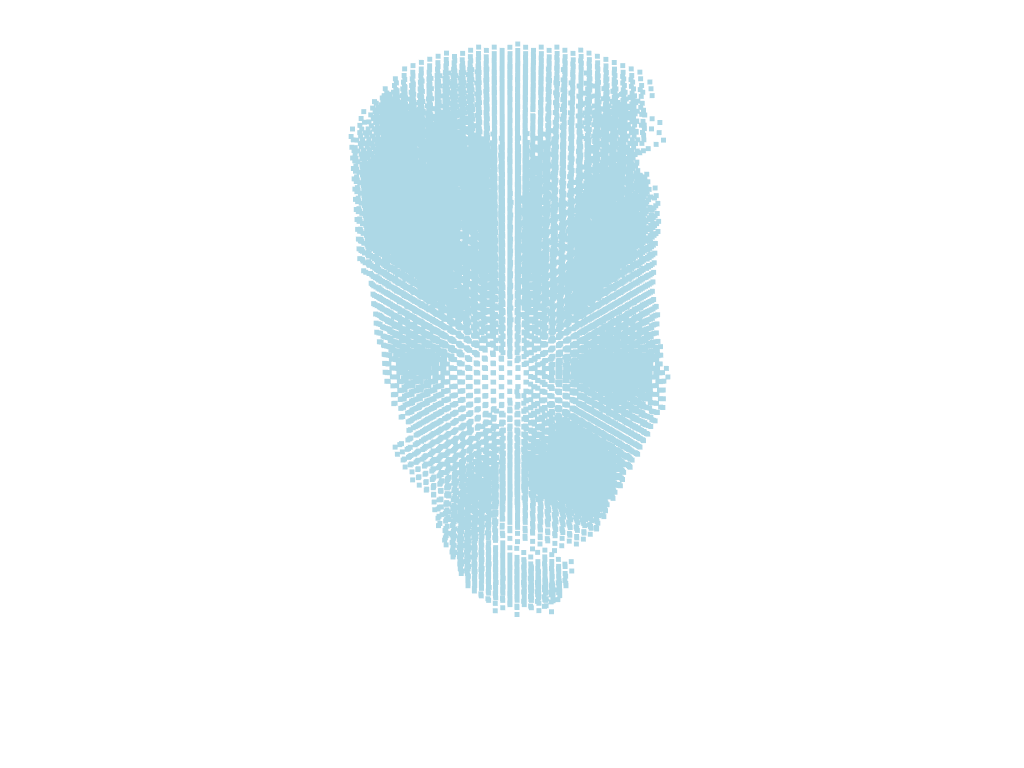

In [5]:
plotter = pv.Plotter()
plotter.add_mesh(pv.PointSet(pointcloud))
plotter.show()

In [6]:
hc.PDList.from_alpha_filtration(pointcloud, 
                                save_to="pointcloud.pdgm",
                                save_boundary_map=True)

PDList(path=pointcloud.pdgm)

In [7]:
pdlist = hc.PDList("pointcloud.pdgm")

In [8]:
pd1 = pdlist.dth_diagram(1)

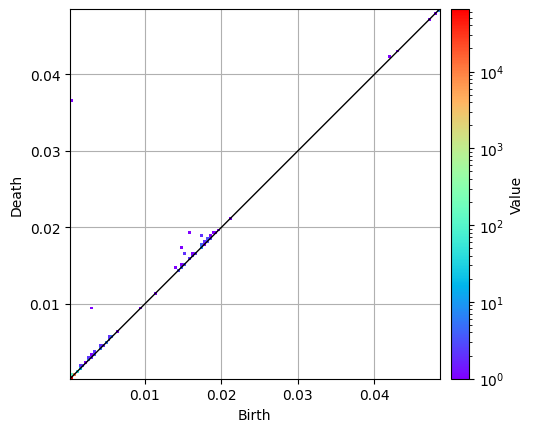

In [9]:
pd1.histogram().plot(colorbar={"type": "log"})

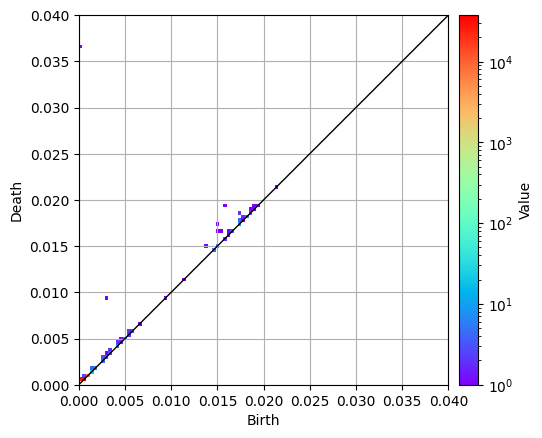

In [10]:
pd1.histogram((0.0, 0.04), 100).plot(colorbar={"type": "log"})

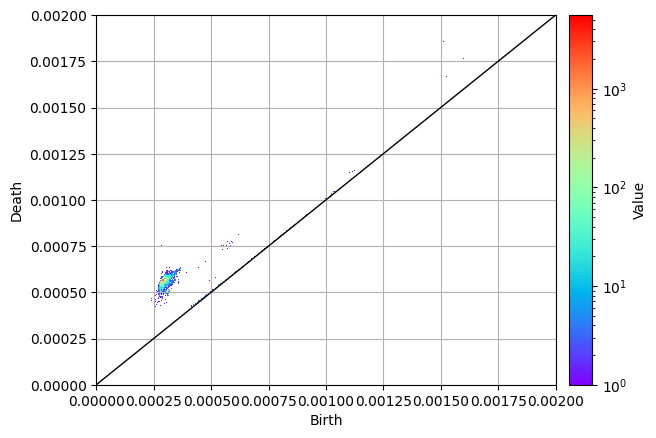

In [11]:
pd1.histogram((0.0, 0.002), 512).plot(colorbar={"type": "log"},aspect=(1,3))

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        5.0000e+00, 1.2000e+01, 1.1920e+03, 1.1326e+04, 1.0955e+04,
        2.8440e+03, 1.2760e+03, 4.0900e+02, 1.8800e+02, 1.4800e+02,
        6.4000e+01, 3.0000e+01, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 4.0000e+00, 5.0000e+00, 1.4000e+01,
        8.0000e+00, 2.2000e+01, 3.3000e+01, 1.1300e+02, 1.5100e+02,
        1.1600e+02, 2.7400e+02, 3.9500e+02, 8.8200e+02, 2.0060e+03,
        5.2500e+03, 1.2843e+04, 9.3550e+03, 3.1420e+03, 1.3930e+03,
        5.4300e+02, 1.8800e+02, 1.2300e+02, 4.9000e+01, 1.9000e+01,
        6.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 8.0000e+00,
        5.0000e+00, 8.0000e+00, 5.0000e+00, 6.00

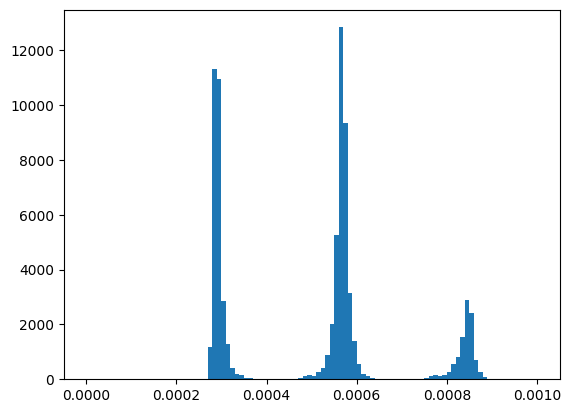

In [12]:
plt.hist(pd1.births, bins=100, range=(0, 0.001))

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.4000e+01, 3.5000e+01, 7.8000e+01, 4.0900e+02,
        7.2600e+02, 2.4770e+03, 1.4507e+04, 3.9822e+04, 6.0770e+03,
        9.5300e+02, 2.3900e+02, 2.6000e+01, 6.0000e+00, 1.0000e+01,
        1.3000e+01, 1.4000e+01, 5.9000e+01, 2.4500e+02, 2.8000e+02,
        8.3400e+02, 2.3580e+03, 5.3000e+03, 9.7100e+02, 1.0400e+02,
        2.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 9.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 7.0000e+00, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 3.0000e+00,
        4.0000e+00, 1.0000e+00, 3.0000e+00, 0.00

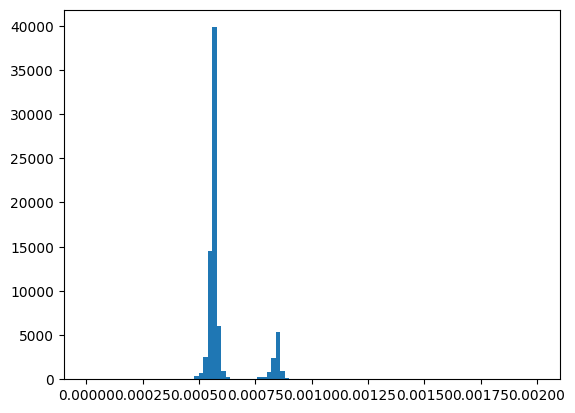

In [13]:
plt.hist(pd1.deaths, bins=100, range=(0, 0.002))

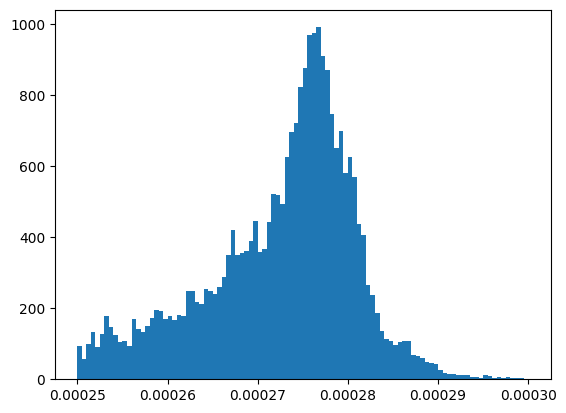

In [14]:
plt.hist(pd1.deaths - pd1.births, bins=100, range=(0.00025, 0.0003)); 

In [15]:
# pair = pd1.nearest_pair_to(0.01, 0.036)

In [16]:
# optimal_volume = pair.optimal_volume()

In [17]:
# fig = go.Figure(data=[
#     optimal_volume.to_plotly3d(width=4, name="Optimal Volume outline"), 
#     optimal_volume.to_plotly3d_mesh(color="red", name="Optimal Volume"), 
#     p3d.PointCloud(pointcloud, color="black", name="Pointcloud")
# ], layout=dict(scene=p3d.SimpleScene()))
# fig.update_layout(width=700,
#                   height=700
#                  )
# fig.update_traces(opacity=0.5, selector=dict(name="Optimal Volume"))

# 複数描画

In [18]:
pairs = [pair for pair in pd1.pairs() if pair.birth_time() < 0.0004 and pair.death_time() > 0.035]
# pairs = [pair for pair in pd1.pairs() if pair.lifetime() < 0.00028 and pair.lifetime() > 0.00027]
len(pairs)

1

In [ ]:
optimal_volumes = [pair.optimal_volume(cutoff_radius=0.3) for pair in pairs]
len(optimal_volumes)

In [ ]:
fig2 = go.Figure(data=[
    v.to_plotly3d(width=4, name=f"({v.birth_time():.5f}, {v.death_time():.5f})") for v in optimal_volumes
] + [
    v.to_plotly3d_mesh(color="red", name=f"({v.birth_time():.5f}, {v.death_time():.5f})") for v in optimal_volumes
] + [
    p3d.PointCloud(pointcloud, color="black", name="Pointcloud")
], layout=dict(scene=p3d.SimpleScene()))
fig2.update_layout(width=700,
                  height=700
                 )

# 空隙

In [ ]:
pd2 = pdlist.dth_diagram(2)
pd2.histogram(x_bins=50).plot(colorbar={"type": "log"})

In [ ]:
plt.hist(pd2.births, bins=100, range=(0,0.03))

In [ ]:
plt.hist(pd2.deaths, bins=100, range=(0,0.03))

In [ ]:
plt.hist(pd2.deaths - pd2.births, bins=100, range=(0,0.0005)); 

In [ ]:
pairs = [pair for pair in pd2.pairs() if pair.birth_time() > 0.015 and pair.lifetime() > 0.0002]

In [ ]:
optimal_volumes = [pair.optimal_volume() for pair in pairs]

In [ ]:
go.Figure(data=[
    v.to_plotly3d(width=4, name=f"({v.birth_time():.5f}, {v.death_time():.5f})") for v in optimal_volumes
] + [
    v.to_plotly3d_mesh(color="red", name=f"({v.birth_time():.5f}, {v.death_time():.5f})") for v in optimal_volumes
] + [
    p3d.PointCloud(pointcloud, color="black", name="Pointcloud")
], layout=dict(scene=p3d.SimpleScene()))